In [129]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics.pairwise import euclidean_distances
import scipy.linalg as la
from scipy.interpolate import Rbf

In [92]:
x0= np.loadtxt("nonlinear_vectorfield_data_x0.txt")
x1= np.loadtxt("nonlinear_vectorfield_data_x1.txt")

In [215]:
delta_t = 1
N= 2000
cols = 2
v = x1-x0 /delta_t
x0_inv = np.linalg.pinv(x0)
A= v.T@x0_inv.T


In [216]:

print(A.shape)

(2, 2)


In [217]:
def solve_2D(A, name="int.png",start=[], max_time=4.0):
    #fig, ax = plt.subplots()
    
    N = len(start)

    #colors = plt.cm.viridis(np.linspace(0, 1, N))
    
    def fx(t, x_y):
        """Compute the time-derivative of a system."""
        fx = A @ x_y
        return fx
    
    
    # Solve for the trajectories
    t = np.arange(0,20,0.01)
    #t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([solve_ivp(fun=fx, t_span=[0, 2000], y0=val, t_eval=t) for val in start])
    
    """
    for i in range(N):
        x = x_t[i].y[0, :]
        y = x_t[i].y[1, :]
        lines = ax.plot(x, y, '-', color=colors[i])
        plt.setp(lines, linewidth=2)

    title = r'$x0 = {0}$'.format(start)
    plt.title(title)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    #plt.savefig(name, format="png")
    plt.show()
    """
    return t, x_t


In [218]:
t, x_t = solve_2D(A,start=x0)


In [219]:
mse = []
edu_dist = 0
for j in range(N):
    x_esti = x_t[j].y.T
    eu_dist =0
    for i in range(N):
        eu_dist += np.sqrt((x_esti[i][0]-x1[i][0])**2 + (x_esti[i][1]-x1[i][1])**2)
    mse.append(eu_dist/N)
print(min(mse))

3.38575043688238


In [220]:
mse = []
for j in range(N):
    x_esti = x_t[j].y.T
    mse.append((np.square( x_esti- x1)).mean(axis=None))
print(min(mse))

6.39061125137936


In [221]:
x = x1[:,0]
y = x1[:,1]
print(x.shape)
print(y.shape)
print(v.shape)  

(2000,)
(2000,)
(2000, 2)


In [222]:
f = Rbf(x1,v)
fi = f(x1)


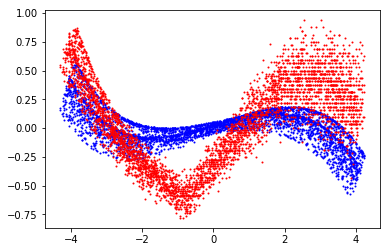

In [223]:
plt.plot(x1, v, 'bo', markersize=1)
plt.plot(x1, fi, 'ro', markersize=1)

In [224]:
mse_rbf = np.square( fi- v).mean(axis=None)

In [225]:
print(mse_rbf)

0.11923437835819746
